In [45]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

%matplotlib inline
from ipywidgets import interact

from ema_workbench import (Model,MultiprocessingEvaluator, SequentialEvaluator, Policy,
                           Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
run_Scenarios=True
n_Scenarios = 1000
outcome_option = 1

df_pol = pd.read_excel(r'Possible policies.xlsx',index_col=0)
try:
    experiments = pd.read_csv('./results/exp_unc_different_pol_{}s_{}.csv'.format(n_Scenarios,outcome_option),index_col=0)
    outcomes = pd.read_csv('./results/out_unc_different_pol_{}s_{}.csv'.format(n_Scenarios,outcome_option),index_col=0)
except:
    experiments = pd.DataFrame()
    outcomes = pd.DataFrame()
    print('No saved data found')
    

In [48]:
ema_logging.log_to_stderr(ema_logging.INFO)
dike_model, planning_steps = get_model_for_problem_formulation(outcome_option)

if __name__ == '__main__':
    
    uncalc_pol = list(set(df_pol.columns) - set(experiments['policy'].unique()))
    policy_list=[]
    
    for column in uncalc_pol:
        policy_list.append(Policy(column, **df_pol[column].to_dict()))
    
    #In case it was asked for, run the experiments
    if run_Scenarios:
        #Prints start time for performance measurements
        print('Started evaluating at:',datetime.now())
        
        with MultiprocessingEvaluator(dike_model) as evaluator:
            results = evaluator.perform_experiments(scenarios=n_Scenarios, 
                                                    policies=policy_list,
                                                    reporting_frequency=100)
        
        #Of course, a stopping time is also needed
        print('Stopped evaluating at:',datetime.now())
        
        #experiments and outcomes are stored in an csv file
        experiments_new, outcomes_new = results
        outcomes_new = pd.DataFrame(outcomes_new)
        
        experiments_to_save= pd.concat([experiments,experiments_new])
        outcomes_to_save= pd.concat([outcomes,outcomes_new])
        
        experiments_to_save.to_csv('./results/exp_unc_different_pol_{}s_{}.csv'.format(n_Scenarios,outcome_option))
        outcomes_to_save.to_csv('./results/out_unc_different_pol_{}s_{}.csv'.format(n_Scenarios,outcome_option))
        
        outcomes = outcomes_to_save
        experiments = experiments_to_save

Started evaluating at: 2019-06-06 17:02:43.416363


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 110 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 130 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 170 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 190 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 210 cases completed
[MainProcess/INFO] 220 cases completed
[MainProcess/INFO] 230 cases 

Stopped evaluating at: 2019-06-06 17:28:16.267874


In [54]:
pd.DataFrame(results[1])

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,5.338536e+08,253800000.0,0.756500
1,3.374567e+09,253800000.0,4.431800
2,5.303554e+08,253800000.0,0.778147
3,2.482293e+08,253800000.0,0.246853
4,3.612416e+08,253800000.0,0.338351
5,1.626818e+08,253800000.0,0.148474
6,2.997193e+09,253800000.0,4.162776
7,2.430416e+08,253800000.0,0.258572
8,1.523036e+09,253800000.0,2.637691
9,3.367510e+09,253800000.0,4.609220


C:\Program Files\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Python\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Python\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


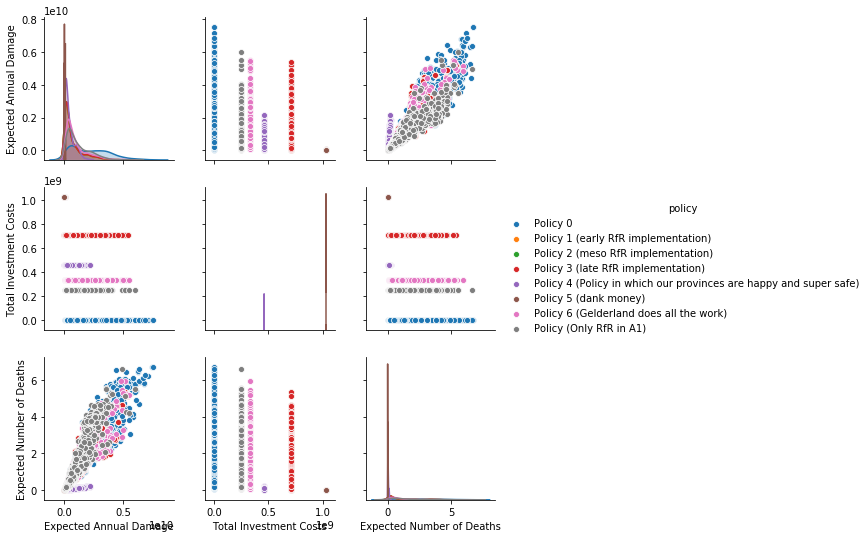

In [49]:
policies = experiments['policy']

data1 = pd.DataFrame(outcomes)
data1['policy'] = policies

sns.pairplot(data1, 
             hue='policy')
plt.show()

Policy 1 (early RfR implementation)
Policy 2 (meso RfR implementation)
Policy 3 (late RfR implementation)
Policy 4 (Policy in which our provinces are happy and super safe)
Policy 5 (dank money)
Policy 6 (Gelderland does all the work)
Policy (Only RfR in A1)


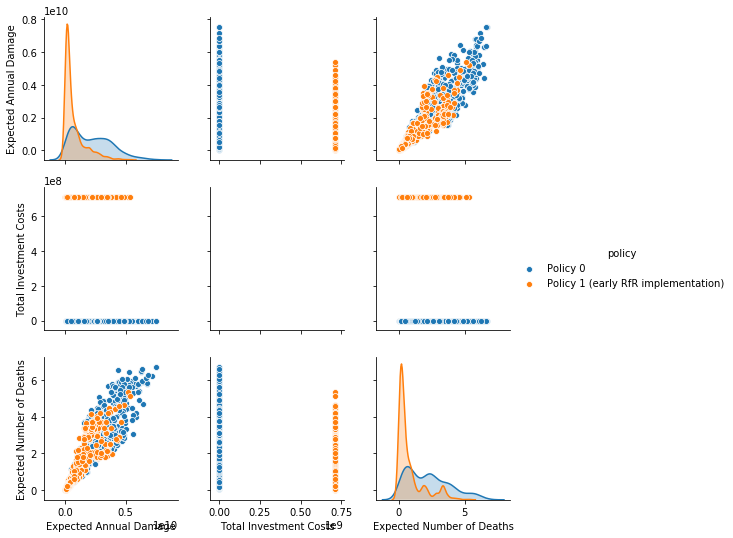

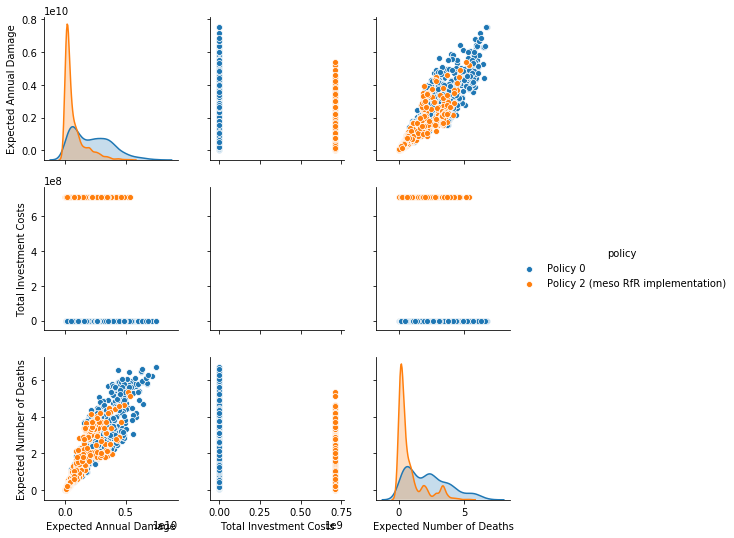

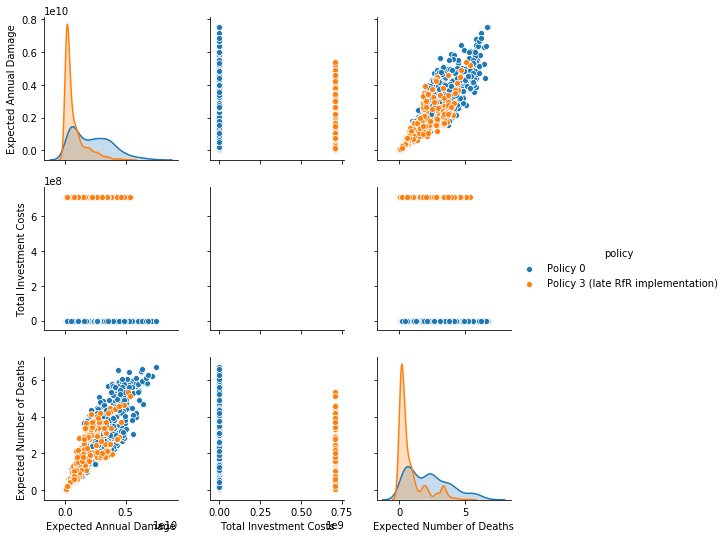

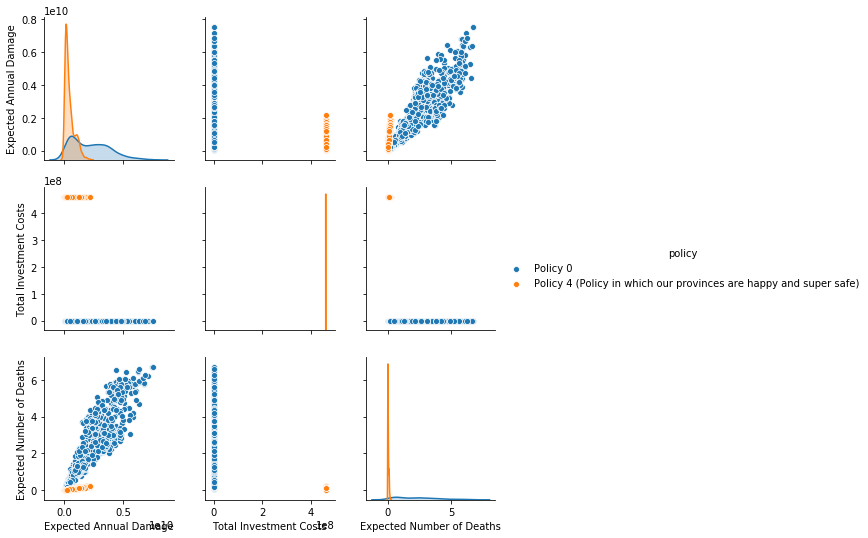

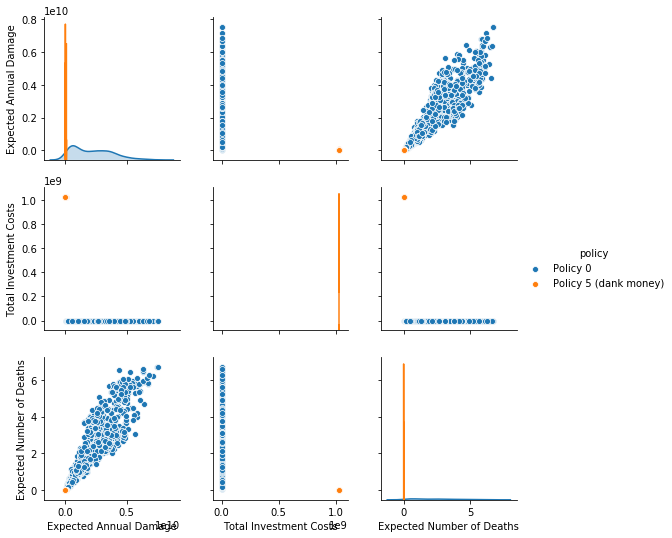

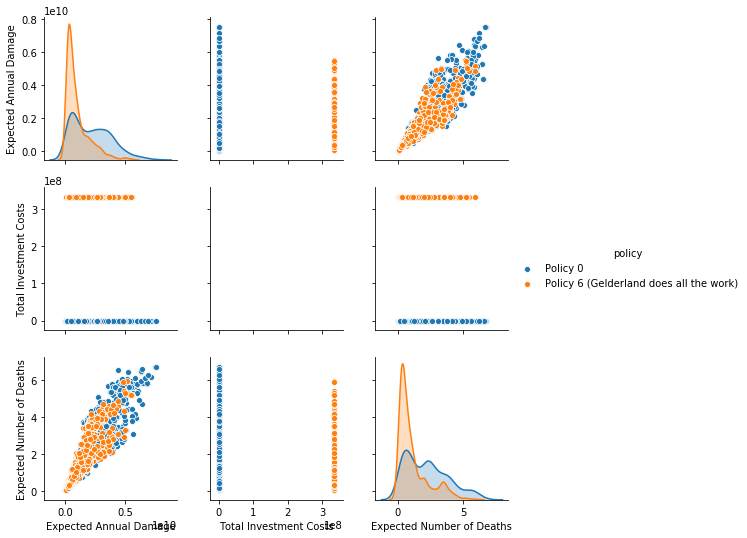

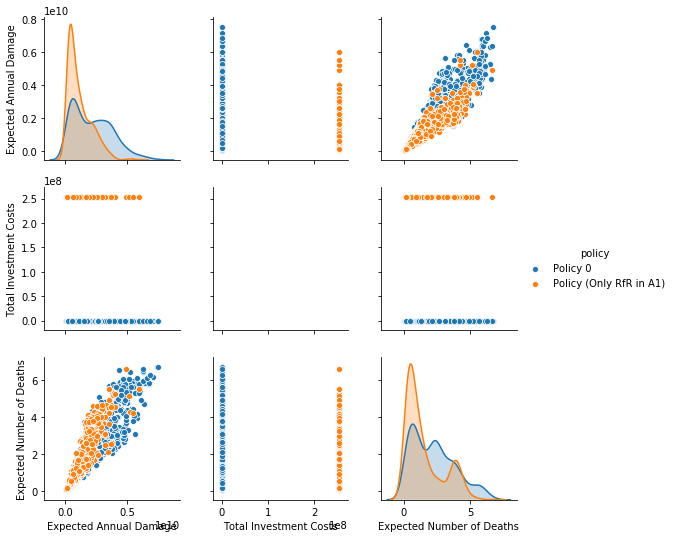

In [50]:
policies = experiments['policy']
data1 = pd.DataFrame(outcomes)
data1['policy'] = policies
#data1['Total cost'] = data1['Expected Annual Damage']*200 + data1['Total Investment Costs']

for pol in experiments['policy'].unique():
    if not pol == 'Policy 0':
        print(pol)
        
        data2 = data1[np.logical_or(data1['policy']=='Policy 0',data1['policy']==pol)]
        sns.pairplot(data2, 
                hue='policy')

Policy 1 (early RfR implementation)
Policy 2 (meso RfR implementation)
Policy 3 (late RfR implementation)
Policy 4 (Policy in which our provinces are happy and super safe)
Policy 5 (dank money)
Policy 6 (Gelderland does all the work)


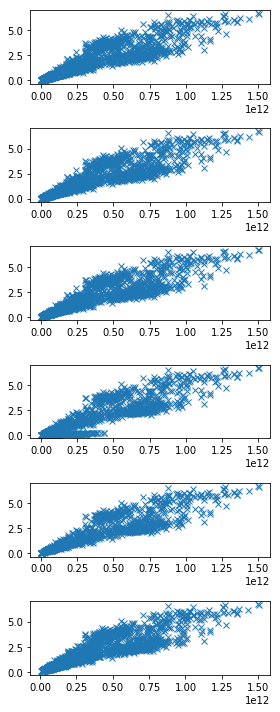

In [43]:
policies = experiments['policy']
data1 = pd.DataFrame(outcomes)
data1['policy'] = policies
data1['Total cost'] = data1['Expected Annual Damage']*200 + data1['Total Investment Costs']

t = len(experiments['policy'].unique())
fig, ax = plt.subplots(t-1,1,figsize=(4,10))

for n, pol in enumerate(experiments['policy'].unique()):
    if not pol == 'Policy 0':
        print(pol)
        data2 = data1[np.logical_or(data1['policy']=='Policy 0',data1['policy']==pol)]
        ax[n-1].plot(data2['Total cost'],data2['Expected Number of Deaths'],marker='x',linewidth=0)
plt.tight_layout()

In [21]:
len(ax)

4